# Understand the dataset

In [1]:
#Import all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
#read dataset using pandas
df = pd.read_csv('PEP1.csv', index_col=0)
df.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


In [3]:
#see list of coloumns in python
for col in df.columns:
    print(col)

MSSubClass
MSZoning
LotFrontage
LotArea
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
OverallQual
OverallCond
YearBuilt
YearRemodAdd
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
MasVnrArea
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
Heating
HeatingQC
CentralAir
Electrical
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
Bedroom
Kitchen
KitchenQual
TotRmsAbvGrd
Functional
Fireplaces
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageCars
GarageArea
GarageQual
GarageCond
PavedDrive
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
PoolQC
Fence
MiscFeature
MiscVal
MoSold
YrSold
SaleType
SaleCondition
SalePrice


In [4]:
#Print shape of dataset
df.shape

(1460, 80)

In [5]:
#print out columns and see null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## Identify Variables with null values

In [6]:
#check for null values
df.isna().sum() #we see there are some null values

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [7]:
df.columns[df.isnull().any()] # we can see which columns have null values

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [8]:
nan_count = df.isna().sum()
print(nan_count)

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64


In [9]:
#Print unique values
print(df['LotArea'].unique())
print(df['MSSubClass'].unique())

[ 8450  9600 11250 ... 17217 13175  9717]
[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]


# Generate a separate dataset for numerical and categorical variables

In [10]:
#Select Numerical and Categorical numbers
print("below are the data types detetced in this dataframe:")
print(df.dtypes.unique()) #Checks all unique types in dataframe, we see there are int, float, and 0 (or null) values

below are the data types detetced in this dataframe:
[dtype('int64') dtype('O') dtype('float64')]


In [11]:
#Numerical Values in DataFrame (confriming new size of dataset)
numerical_feature_columns = list(df._get_numeric_data().columns)
numerical_feature_columns
len(numerical_feature_columns)

37

In [12]:
#Create new dataframe of only Numerical Data
df_n = df.select_dtypes(include='number')
print(df_n.shape)

#Create New dataframe of only Categorical Data
df_c = df.select_dtypes(include='object')
print(df_c.shape)

(1460, 37)
(1460, 43)


In [13]:
#Categorical Features (confriming new dataset has all categorical data
categorical_feature_columns = list(set(df.columns) - set(df._get_numeric_data().columns))
print(categorical_feature_columns)
len(categorical_feature_columns)

['Exterior1st', 'Fence', 'CentralAir', 'BsmtCond', 'LandContour', 'Utilities', 'PoolQC', 'MiscFeature', 'KitchenQual', 'BldgType', 'MasVnrType', 'HeatingQC', 'Neighborhood', 'ExterQual', 'GarageType', 'GarageCond', 'SaleType', 'PavedDrive', 'Electrical', 'Condition2', 'FireplaceQu', 'LotShape', 'SaleCondition', 'RoofMatl', 'RoofStyle', 'GarageFinish', 'LotConfig', 'Exterior2nd', 'BsmtQual', 'Heating', 'Street', 'Alley', 'GarageQual', 'Foundation', 'BsmtFinType1', 'BsmtFinType2', 'HouseStyle', 'MSZoning', 'BsmtExposure', 'LandSlope', 'ExterCond', 'Functional', 'Condition1']


43

# EDA of numeric values

## Removing Missing Values

In [14]:
#For Loop Removing Missing Value Rows
print('Original shape: ', df_n.shape)
for column in df_n:
    percentage_of_missing_values = (df_n[column].isna().sum(axis=0)/df_n.shape[0])*100 #check for percentage of missing values and see if we need to remove the rows
    if percentage_of_missing_values <= 30 : #Less than 30% missing values is industry practice
        count = df_n[column].isna().sum() #count how many missing values will be removed
        df_n = df_n.dropna(subset=[column]) #dropna rows in column
        print('Dropped ', count, 'entries from', column) #print process
print('New shape: ', df_n.shape)

Original shape:  (1460, 37)
Dropped  0 entries from MSSubClass
Dropped  259 entries from LotFrontage
Dropped  0 entries from LotArea
Dropped  0 entries from OverallQual
Dropped  0 entries from OverallCond
Dropped  0 entries from YearBuilt
Dropped  0 entries from YearRemodAdd
Dropped  6 entries from MasVnrArea
Dropped  0 entries from BsmtFinSF1
Dropped  0 entries from BsmtFinSF2
Dropped  0 entries from BsmtUnfSF
Dropped  0 entries from TotalBsmtSF
Dropped  0 entries from 1stFlrSF
Dropped  0 entries from 2ndFlrSF
Dropped  0 entries from LowQualFinSF
Dropped  0 entries from GrLivArea
Dropped  0 entries from BsmtFullBath
Dropped  0 entries from BsmtHalfBath
Dropped  0 entries from FullBath
Dropped  0 entries from HalfBath
Dropped  0 entries from Bedroom
Dropped  0 entries from Kitchen
Dropped  0 entries from TotRmsAbvGrd
Dropped  0 entries from Fireplaces
Dropped  74 entries from GarageYrBlt
Dropped  0 entries from GarageCars
Dropped  0 entries from GarageArea
Dropped  0 entries from WoodD

## Saleprice Correlation Matrix

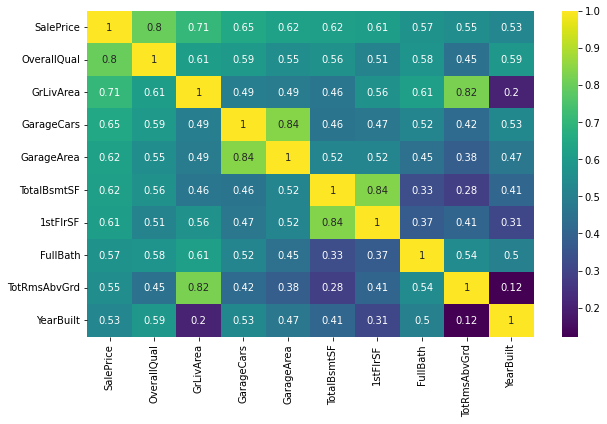

In [15]:
k = 10 #number of variables for heatmap
cols = df_n.corr().nlargest(k, 'SalePrice')['SalePrice'].index
cm = df_n[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')
plt.show()

In [16]:
#Remove Multi-Correlated Values
#We can see from above matrix that "OverallQual, GrLiv, and Garage cars are highly correlated with salePrice
#We need to remove confounding variables, variables that also highly influcecne these other correlated vairables

#removing TotRmsAbvGrd, GarageCars, 1stFlrSF and GarageYrBlt

df_n = df_n.drop(['TotRmsAbvGrd', 'GarageCars', '1stFlrSF', 'GarageYrBlt'], axis=1)
print(df_n.shape)

(1121, 33)


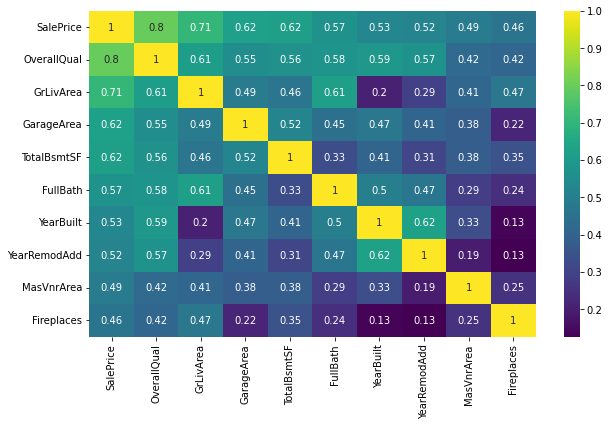

In [17]:
# new heat map
k = 10 #number of variables for heatmap
cols = df_n.corr().nlargest(k, 'SalePrice')['SalePrice'].index
cm = df_n[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')
plt.show()

Notes:

OverallQual, GrLivArea, GarageArea, TotalBsmtSF, and FullBath are the 5 srongest correlated numeric values. However printing FullBath unique values reveal that these are discrete variables. Thus for the purposes of analysis it may be better to analyze YearBuilt instead of fullbath.
OverallQual is also a discrete variable, but it is by far the highest correlated variable with SalePrice, as expected.

## Skewness and Distribution

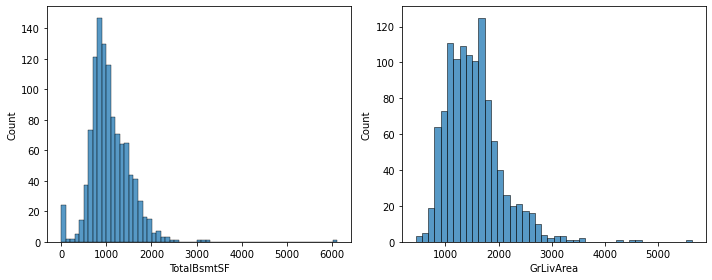

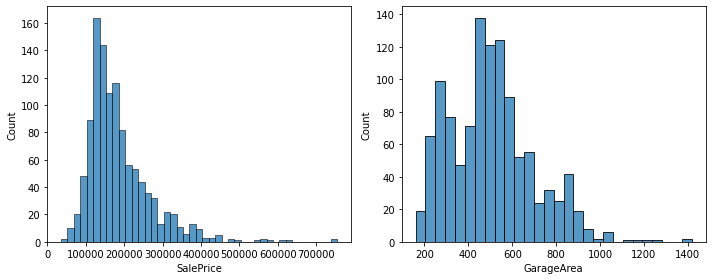

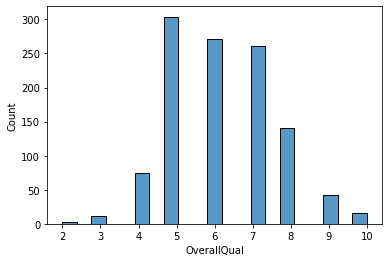

In [18]:
#plotting histograms to detect skewness we are intrested in 5 values, Saleprice, OverallQual, GrLivArea, GarageArea, TotalBsmtSF
num_cols = ['TotalBsmtSF', 'GrLivArea', 'SalePrice', 'GarageArea']

for i in range(0,len(num_cols),2):
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.histplot(df_n[num_cols[i]], kde=False)
        plt.subplot(122)            
        sns.histplot(df_n[num_cols[i+1]], kde=False)
        plt.tight_layout()
        plt.show()
sns.histplot(df_n['OverallQual'])
plt.show()

#We see positevly skewed ToalMsmtSF, GrLivArea, SalePrice, and GarageArea, OverallQual is also slighlty positevly skewed

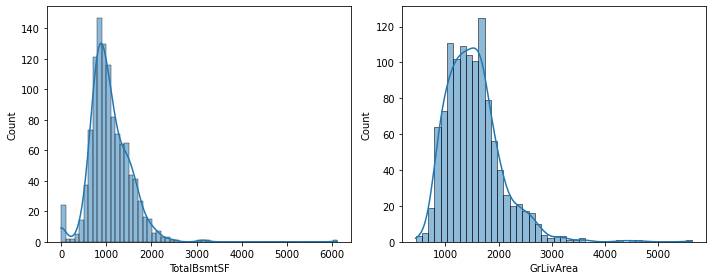

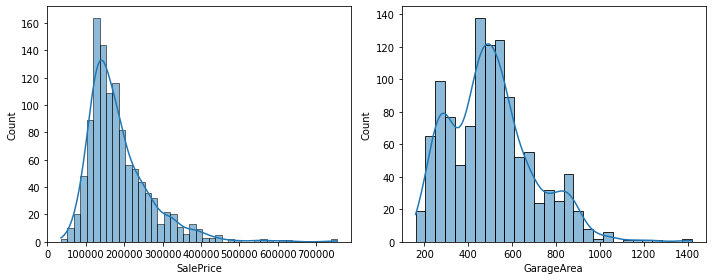

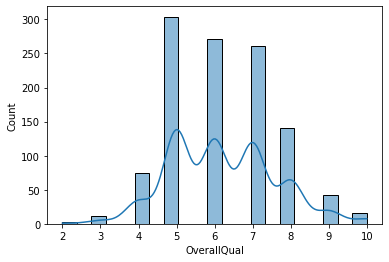

In [52]:
#Kernel Density, better visualize distribution of numerical data
num_cols = ['TotalBsmtSF', 'GrLivArea', 'SalePrice', 'GarageArea']
for i in range(0,len(num_cols),2):
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.histplot(df_n[num_cols[i]], kde=True)
        plt.subplot(122)            
        sns.histplot(df_n[num_cols[i+1]], kde=True)
        plt.tight_layout()
        plt.show()
sns.histplot(df_n['OverallQual'], kde=True)
plt.show()

## PairPlot for distribution and density

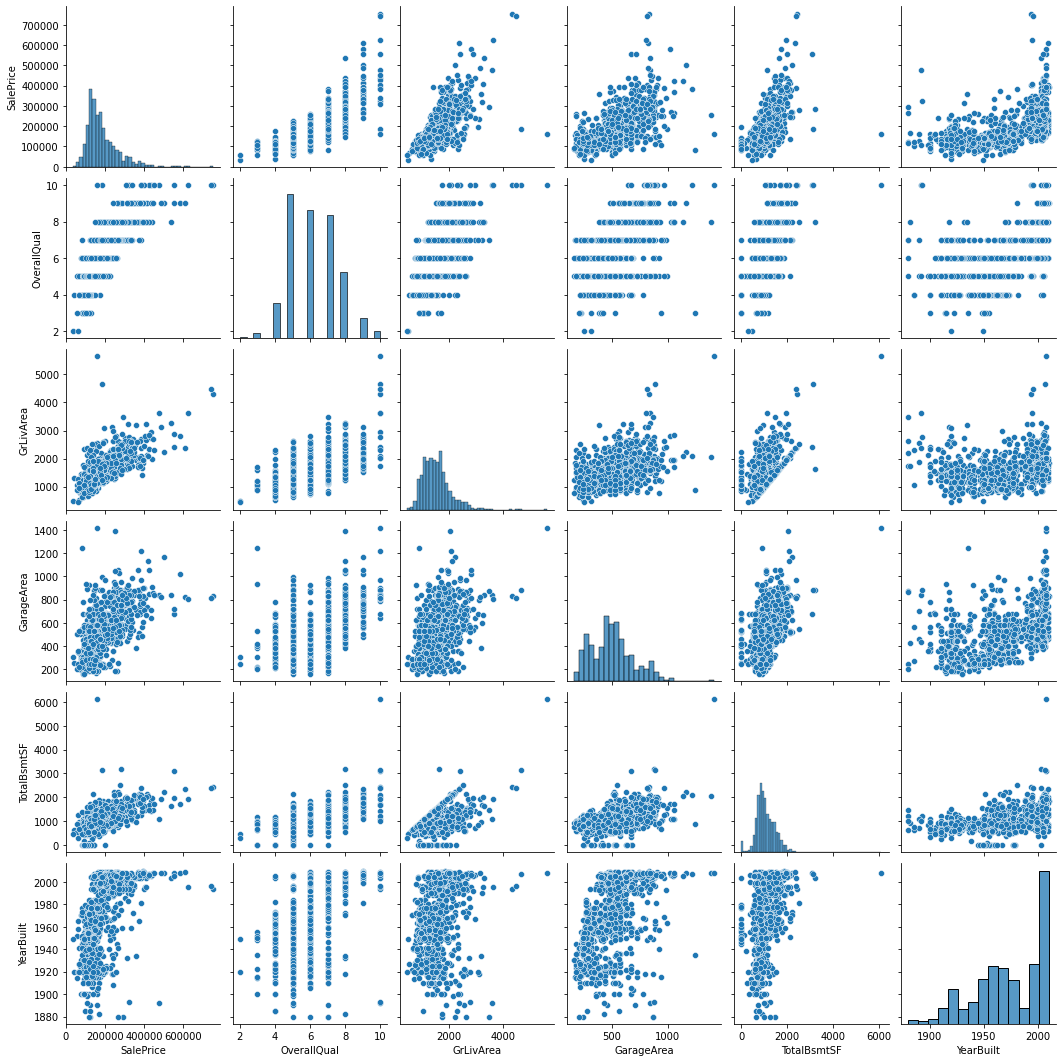

In [53]:
#PairPlot
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'YearBuilt']
sns.pairplot(df_n[cols])
plt.show()

In [22]:
df_n.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,...,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000
mean,56.146298,70.665477,10122.956289,6.212310,5.561106,1972.264942,1985.683318,108.487957,438.399643,44.589652,...,92.610169,46.130241,21.844781,3.348796,16.100803,2.934880,23.429081,6.339875,2007.795718,185506.152542
std,41.772684,24.266812,8129.302641,1.380822,1.068236,30.967730,21.025974,189.500966,468.385038,157.828725,...,121.868623,64.390029,61.282083,29.772540,57.801829,40.222087,165.759816,2.687854,1.335043,82999.159004
min,20.000000,21.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,20.000000,60.000000,7590.000000,5.000000,5.000000,1953.000000,1966.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,131000.000000
50%,50.000000,70.000000,9416.000000,6.000000,5.000000,1974.000000,1995.000000,0.000000,374.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,164900.000000
75%,70.000000,80.000000,11361.000000,7.000000,6.000000,2003.000000,2005.000000,170.000000,702.000000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,219500.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,648.000000,2500.000000,12.000000,2010.000000,755000.000000


# EDA of Categorical Variables

## Missing Value Treatment

In [23]:
#For Loop Removing Missing Categorical Values
print('Original shape: ', df_c.shape)
for column in df_c:
    percentage_of_missing_values = (df_c[column].isna().sum(axis=0)/df_c.shape[0])*100 #check for percentage of missing values and see if we need to remove the rows
    if percentage_of_missing_values <= 30: #Less than 30% missing values is industry practice
        count = df_c[column].isna().sum() #count how many missing values will be removed
        df_c = df_c.dropna(subset=[column]) #dropna rows in column
        print('Dropped ', count, ' entries from', column)#print process
print('New shape: ', df_c.shape)

Original shape:  (1460, 43)
Dropped  0  entries from MSZoning
Dropped  0  entries from Street
Dropped  0  entries from LotShape
Dropped  0  entries from LandContour
Dropped  0  entries from Utilities
Dropped  0  entries from LotConfig
Dropped  0  entries from LandSlope
Dropped  0  entries from Neighborhood
Dropped  0  entries from Condition1
Dropped  0  entries from Condition2
Dropped  0  entries from BldgType
Dropped  0  entries from HouseStyle
Dropped  0  entries from RoofStyle
Dropped  0  entries from RoofMatl
Dropped  0  entries from Exterior1st
Dropped  0  entries from Exterior2nd
Dropped  8  entries from MasVnrType
Dropped  0  entries from ExterQual
Dropped  0  entries from ExterCond
Dropped  0  entries from Foundation
Dropped  37  entries from BsmtQual
Dropped  0  entries from BsmtCond
Dropped  1  entries from BsmtExposure
Dropped  0  entries from BsmtFinType1
Dropped  1  entries from BsmtFinType2
Dropped  0  entries from Heating
Dropped  0  entries from HeatingQC
Dropped  0  en

## Count Plot for bivariate analysis

In [24]:
##looking at some categorical data now
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 1 to 1460
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1338 non-null   object
 1   Street         1338 non-null   object
 2   Alley          81 non-null     object
 3   LotShape       1338 non-null   object
 4   LandContour    1338 non-null   object
 5   Utilities      1338 non-null   object
 6   LotConfig      1338 non-null   object
 7   LandSlope      1338 non-null   object
 8   Neighborhood   1338 non-null   object
 9   Condition1     1338 non-null   object
 10  Condition2     1338 non-null   object
 11  BldgType       1338 non-null   object
 12  HouseStyle     1338 non-null   object
 13  RoofStyle      1338 non-null   object
 14  RoofMatl       1338 non-null   object
 15  Exterior1st    1338 non-null   object
 16  Exterior2nd    1338 non-null   object
 17  MasVnrType     1338 non-null   object
 18  ExterQual      1338 non-null

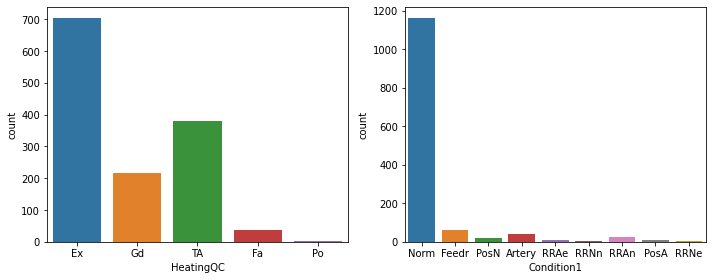

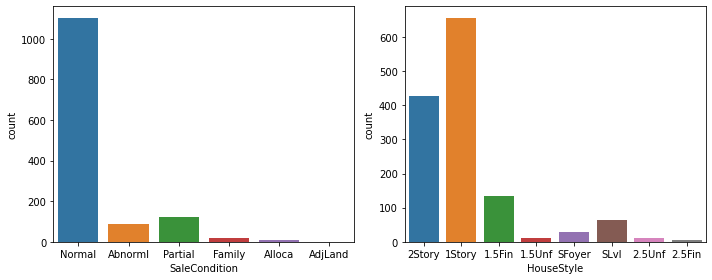

In [48]:
num_cols = ['HeatingQC', 'Condition1', 'SaleCondition', 'HouseStyle']
for i in range(0,len(num_cols),2):
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.countplot(x = df_c[num_cols[i]])
        plt.subplot(122)            
        sns.countplot(x = df_c[num_cols[i+1]])
        plt.tight_layout()
        plt.show()

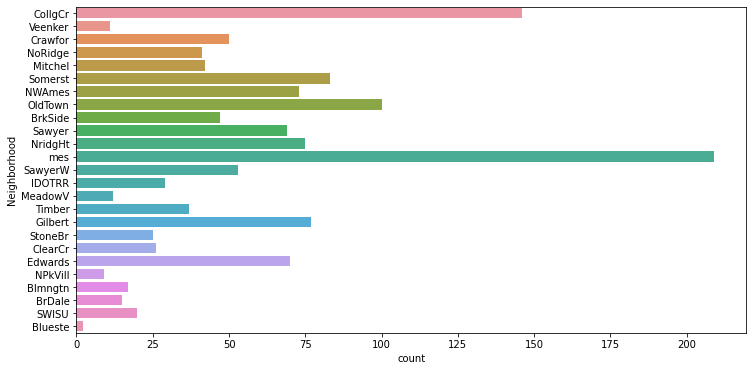

In [26]:
plt.figure(figsize=(12,6))
sns.countplot(y='Neighborhood', data=df_c)
plt.show()

In [27]:
#catagorical vs catagorical, using crosstab function

crosstab = pd.crosstab(index=df_c["Neighborhood"], columns=df_c["HeatingQC"])
crosstab

HeatingQC,Ex,Fa,Gd,Po,TA
Neighborhood,,,,,
Blmngtn,17,0,0,0,0
Blueste,0,0,0,0,2
BrDale,1,0,2,0,12
BrkSide,16,2,10,0,19
ClearCr,12,1,6,0,7
CollgCr,127,0,5,0,14
Crawfor,22,5,8,0,15
Edwards,31,6,12,0,21
Gilbert,52,0,24,0,1


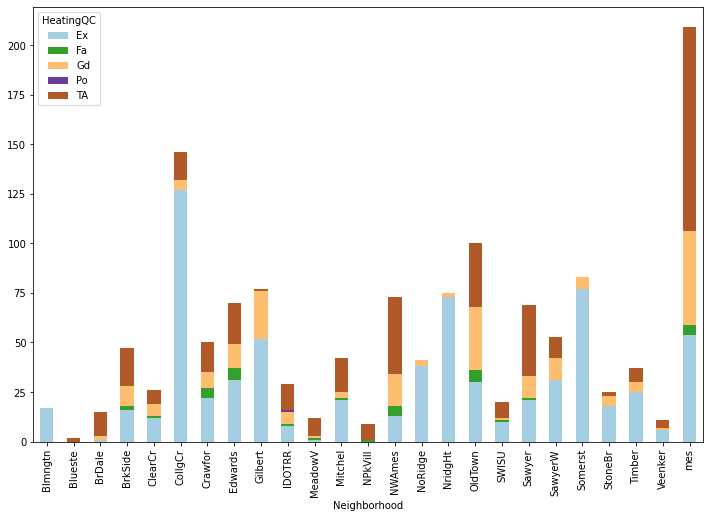

In [46]:
#visualize Crosstab
crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')
plt.show()

## Identify Significant Variables using p-values and Chi-Square Values

In [37]:
import scipy.stats
from scipy.stats import chi2

#define columns we want to look at

col1 = "HeatingQC"
col2 = "Neighborhood"

#Create contigency table for chi-sqaured test

contingency_table=pd.crosstab(df_c[col1],df_c[col2])
print('contingency_table :-\n',contingency_table)
#define alpha before test

alpha = 0.05

#Function to calculate test statsitic value, p-value, degrees of freedom and expected values

chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(contingency_table)
critical_value=chi2.ppf(q=1-alpha,df=dof)
#print results
print(f"Cirtical Value:", critical_value)
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

#Interprit results
if chi2_stat >= critical_value:
    print("Reject Null,", col1, "and ", col2, "show significant dependence on each other")
if p<=alpha:
    print("Reject Null,", col1, "and ", col2, "show significant dependence on each other")
else:
    print("Accept Null,", col1, "and ", col2, "do NOT show significant dependence on each other")

contingency_table :-
 Neighborhood  Blmngtn  Blueste  BrDale  BrkSide  ClearCr  CollgCr  Crawfor  \
HeatingQC                                                                    
Ex                 17        0       1       16       12      127       22   
Fa                  0        0       0        2        1        0        5   
Gd                  0        0       2       10        6        5        8   
Po                  0        0       0        0        0        0        0   
TA                  0        2      12       19        7       14       15   

Neighborhood  Edwards  Gilbert  IDOTRR  ...  NridgHt  OldTown  SWISU  Sawyer  \
HeatingQC                               ...                                    
Ex                 31       52       8  ...       73       30     10      21   
Fa                  6        0       1  ...        0        6      1       1   
Gd                 12       24       6  ...        2       32      1      11   
Po                  0        0 

In [54]:
# Looking into ANOVA for SalePrice significance

import statsmodels.api as sm
from statsmodels.formula.api import ols
df_anova2 = pd.read_csv("PEP1.csv")
# Performing two-way ANOVA
model = ols('SalePrice ~ C(HeatingQC) + C(Condition1) +\
C(HeatingQC):C(Condition1)',
            data=df_anova2).fit()
result = sm.stats.anova_lm(model, type=2)
# Print the result
print(result)

                                df        sum_sq       mean_sq          F  \
C(HeatingQC)                   4.0  1.800151e+12  4.500378e+11  90.402887   
C(Condition1)                  8.0  1.892840e+11  2.366050e+10   4.752885   
C(HeatingQC):C(Condition1)    32.0  1.298103e+11  4.056572e+09   0.814878   
Residual                    1433.0  7.133668e+12  4.978135e+09        NaN   

                                  PR(>F)  
C(HeatingQC)                1.390106e-68  
C(Condition1)               8.901713e-06  
C(HeatingQC):C(Condition1)  7.586649e-01  
Residual                             NaN  


# Combine all significant categorical and numerical variables

In [50]:
#Taking top 5 signifcant numerical and categorical variables
df_sig_n = df_n.filter(['SalePrice','GrLivArea', 'GarageArea', 'TotalBsmtSF', 'YearBuilt'], axis=1)
print("Shape of numerical data: ", df_sig_n.shape)

df_sig_c = df_c.filter(['HeatingQC','SaleCondition', 'Neighborhood', 'Condition1', 'HouseStyle'], axis=1)
print("Shape of categorical data:", df_sig_c.shape)

#combining into one new dataframe

df_final = pd.concat([df_sig_n, df_sig_c], axis=1)
print("Shape of final data: ", df_final.shape)
df_final.head(10)
df_final.info()

#For Loop Removing Missing Value Rows
print('Original shape: ', df_final.shape)
for column in df_final:
    percentage_of_missing_values = (df_final[column].isna().sum(axis=0)/df_final.shape[0])*100 #check for percentage of missing values and see if we need to remove the rows
    count = df_final[column].isna().sum() #count how many missing values will be removed
    df_final = df_final.dropna(subset=[column]) #dropna rows in column
    print('Dropped ', count, 'entries from', column) #print process
print('New shape: ', df_final.shape)
df_final.info()

Shape of numerical data:  (1121, 5)
Shape of categorical data: (1338, 5)
Shape of final data:  (1365, 10)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1365 entries, 1 to 1460
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SalePrice      1121 non-null   float64
 1   GrLivArea      1121 non-null   float64
 2   GarageArea     1121 non-null   float64
 3   TotalBsmtSF    1121 non-null   float64
 4   YearBuilt      1121 non-null   float64
 5   HeatingQC      1338 non-null   object 
 6   SaleCondition  1338 non-null   object 
 7   Neighborhood   1338 non-null   object 
 8   Condition1     1338 non-null   object 
 9   HouseStyle     1338 non-null   object 
dtypes: float64(5), object(5)
memory usage: 117.3+ KB
Original shape:  (1365, 10)
Dropped  244 entries from SalePrice
Dropped  0 entries from GrLivArea
Dropped  0 entries from GarageArea
Dropped  0 entries from TotalBsmtSF
Dropped  0 entries from YearBuilt
Dr

# Plot Box Plot for new dataset to find variables with outliers

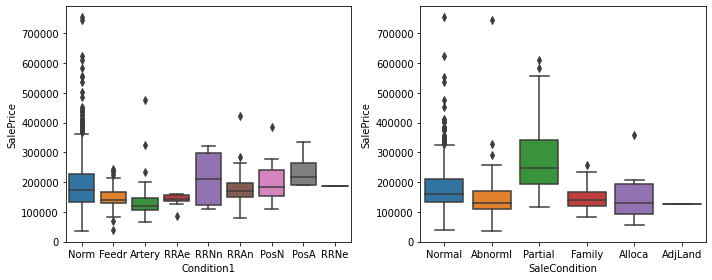

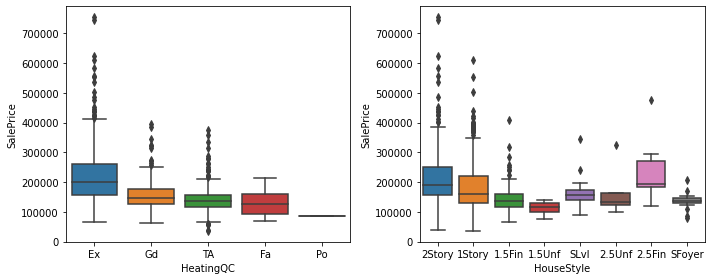

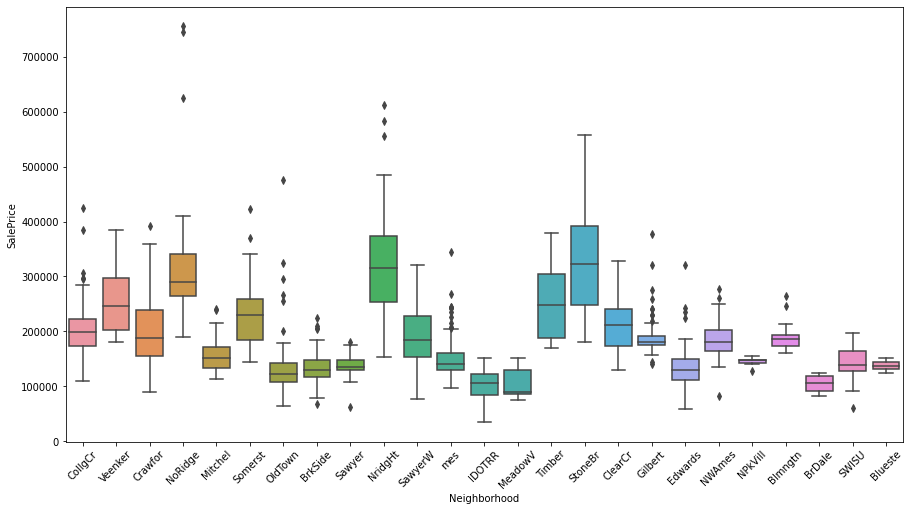

In [51]:
#box plots for final data 
#combares numerical data, saleprice, with categorical data
num_cols = ['Condition1', 'SaleCondition', 'HeatingQC', 'HouseStyle']

for i in range(0,len(num_cols),2):
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.boxplot(x = num_cols[i], y='SalePrice', data=df_final)
        plt.subplot(122)            
        sns.boxplot(x = num_cols[i+1], y='SalePrice', data=df_final)
        plt.tight_layout()
        plt.show()
plt.figure(figsize=(15,8))
plt.xticks(rotation = 45)
sns.boxplot(x= 'Neighborhood', y='SalePrice', data=df_final)
plt.show()

We can see that Excellent heating quality is a significant variable in prediciting high saleprice. There are a noticable amount of outliers above the respective boxplot.
Likewise we also see for Condition1, Normal condition and RRNn are good predictiers for high saleprice. RRNn makes sense, as this indicates the house is located close to a railroad, indicating convience for the customer when travel times are a big factor for buying a house. "Normal condition" is assumed to otherwise be an otherwise optimal condition for the house (i.e. no negatives). There are a very large amount of outliers located in the "Norm" condition.

Neighborhoods have a strong relationship with SalePrice. Evenmore so we can see specific neighborhoods are indicative of higher or lower save price. NridgHT and StoneBR have the hisghest IQR out of all the other nieghborhood catagories.